### Ant Colony Optimiation

- We are generating random points so that we can plot it in the graph


In [1]:
from random import randint,choices
total_num_of_points = 80
all_points = [(randint(0,200),randint(0,200)) for i in range(total_num_of_points)]
total_num_of_points = len(all_points)
points_name = [i for i in range(total_num_of_points)]
starting_point = 0

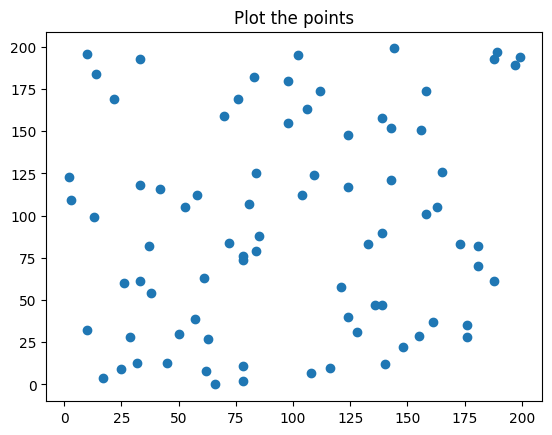

In [2]:
import matplotlib.pyplot as plt
plt.scatter([x[0] for x in all_points],[x[1] for x in all_points],label="Points")
plt.title("Plot the points")
plt.show()

## Find distance between two points

In [3]:
import math
def get_distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2

    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

## Initialize path_matrix (distance between two points) and pheromone matrix (pheromone value)

In [4]:
path_matrix = [[ get_distance(x,y) for y in all_points] for x in all_points]
pheromone_matrix =[[0.1 for y in all_points] for x in all_points]

### Printing the data in a beautiful way

In [5]:
def formatted_print(data):
    for i in data:
        print(i)

### Calculating the probability using the equation

In [6]:
etta = 1.5
xetta =1.5
def get_probability(phero,l):
    return math.pow(phero,etta)*math.pow(1/l,xetta)

### Choose the option based on probability value based on all the values

In [7]:
def choose_destinatination(start_from,not_visited) -> int:
    all_propbaility = []
    for m in not_visited:
        t = get_probability(pheromone_matrix[start_from][m],path_matrix[start_from][m])
        all_propbaility.append(t)
    z = choices(not_visited,all_propbaility)
    return z[0]


### Find the total distance travelled by summing the distances

In [8]:
def get_distance_performance(path):
    path_length = []
    for i in range(len(path)-1):
        path_length.append(path_matrix[path[i]][path[i+1]])
    total_distance = sum(path_length)
    return total_distance

### Plot the graph

In [9]:
def plot(points):
    plt.scatter([x[0] for x in all_points],[x[1] for x in all_points],label="Points")
    path_points = [all_points[x] for x in points]
    plt.plot([x[0] for x in path_points],[x[1] for x in path_points],label="Points")
    plt.title(get_distance_performance(points))
    plt.show()

### Update the pheromones

In [10]:
loss_of_smell = 0
def update_pheromone(path):
    path_length = []
    for i in range(len(path)-1):
        path_length.append(path_matrix[path[i]][path[i+1]])
    total_distance = sum(path_length)
    for i in range(len(path)-1):
        pheromone_matrix[path[i]][path[i+1]] = pheromone_matrix[path[i]][path[i+1]] + 1/total_distance
    for i in range(len(pheromone_matrix)):
        for j in range(len(pheromone_matrix[0])):
            pheromone_matrix[i][j] = pheromone_matrix[i][j] * (1-loss_of_smell)

### Iteration of ant colony algorithm

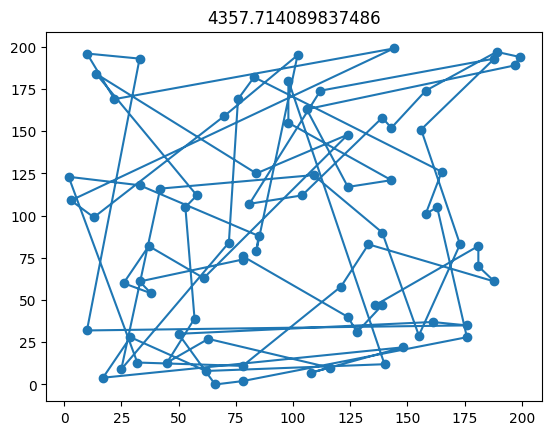

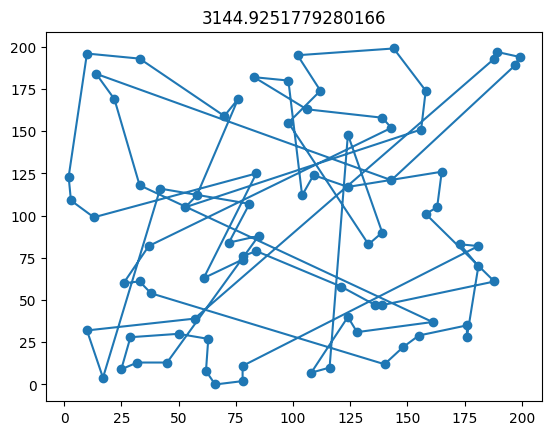

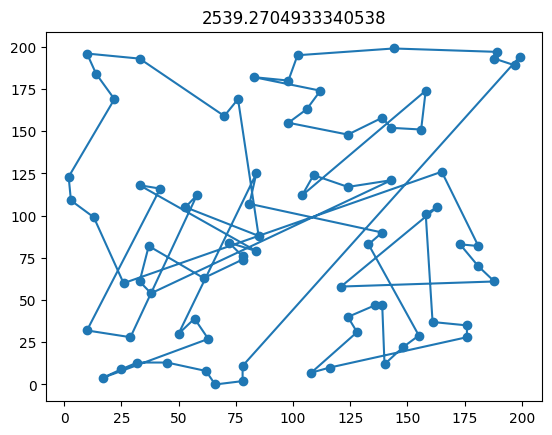

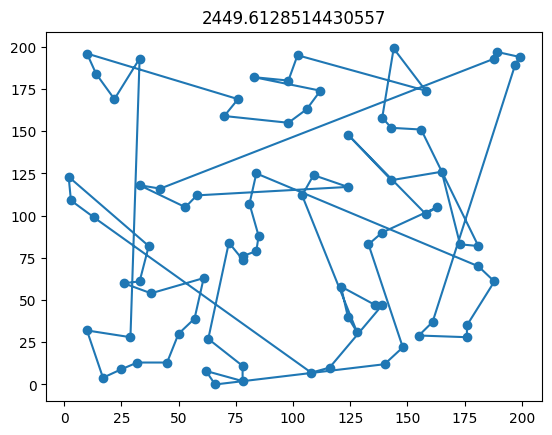

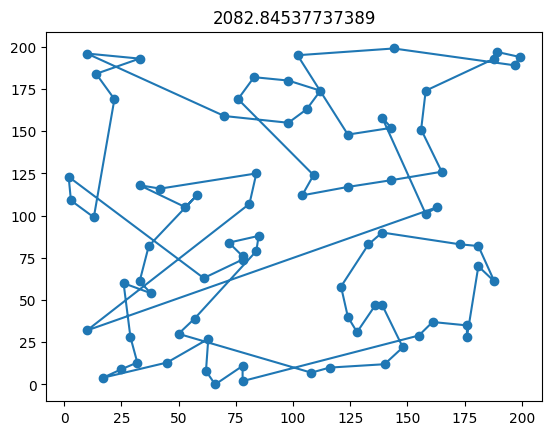

In [11]:
total_iterations = 100
pathAll : list[list[int]]=[]
total_ants= total_num_of_points * 5
for x in range(total_iterations):
    pathAll = []
    for i in range(total_ants):
        path : list[int]=[]
        not_visited= points_name.copy()
        not_visited.pop(starting_point)
        path.append(starting_point)
        start_from = starting_point
        while len(not_visited) > 0:
            destination = choose_destinatination(start_from, not_visited)
            start_from = destination
            not_visited =[x for x in not_visited if x!= destination]
            path.append(destination)
        path.append(starting_point)
        pathAll.append(path.copy())
    for path in pathAll:
        update_pheromone(path)
    if x % 20 == 0:
        plot(path)
        #formatted_print(pheromone_matrix)
